#### Preliminaries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm
import skimage.color as skl
from skimage import io

#### Load and plot the figure to reproduce (used with permission)

Figure 1 from: 

Froner, B., Purves, Steve, Lowell, J., and Henderson, J. (2013). 
Perception of visual information: The role of colour in seismic interpretation. 
First Break. 31. 
10.3997/1365-2397.2013010. 

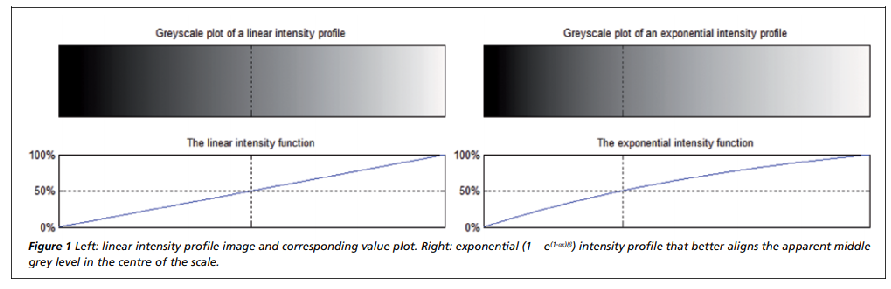

In [2]:
froner_et_al=io.imread('Froner_et_al_Figure_1.png')
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(froner_et_al);


#### Helper functions

In [3]:
def expo(x,a,b):
    """
    Makes an exponential curve.  
    
    Parameter:
        x (array): the x coordinate
        a (int): 
        b (int):   
        
    Returns:
        y (array): the 1D exponential curve
    """
    y = np.array(1-(np.exp(1-(a*x))/b))
    return 100.0*(y-min(y))/(max(y)-min(y)) 

def rgb_expo(y):
    """ 
    Makes an RGB array of size 256x256, which can then be plotted as rectuangular colorbar image
    (with a specific plt.imshow aspect ratio)
    
    Parameters:
        y (array): exponential 1D curve. Can be output of expo function. 
        It is used as Lightness (L) dimension of initial Lab array
    
    Returns:
        rgb_exponential (array): the 256x256 RGB array
    """
    lexp = np.tile(y, (256,1))
    aexp = np.zeros((256,256))
    bexp = np.zeros((256,256))
    lab_exp = np.array(list(zip(lexp, aexp, bexp)))
    lab_exponential = np.swapaxes(lab_exp,1,2)
    rgb_exponential = skl.lab2rgb(lab_exponential)
    return rgb_exponential

def rgb_cmap(rgb_exponential):
    """ 
    Makes a Matplotlib LinearSegmentedColormap RGB exponential grayscale
    
    Parameters:
        rgb_exponential (array): exponential RGB array. Can be output of rgb_expo function   
    
    Returns:
        my_exp_cmap: LinearSegmentedColormap
    """
    r_exp = rgb_exponential[0,:,0]
    g_exp = rgb_exponential[0,:,1]
    b_exp = rgb_exponential[0,:,2]

    # sample 256 not perfectly 1. Normalizing y to [0-1]
    normr_exp=(r_exp-min(r_exp))/(max(r_exp)-min(r_exp))
    normg_exp=(g_exp-min(g_exp))/(max(g_exp)-min(g_exp))
    normb_exp=(b_exp-min(b_exp))/(max(b_exp)-min(b_exp))
    
    b3=normb_exp # value of blue at sample n
    b2=normb_exp # value of blue at sample n
    b1=np.linspace(0,1,len(b2)) # position of sample n - ranges from 0 to 1
    g3=normg_exp 
    g2=normg_exp
    g1=np.linspace(0,1,len(g2))
    r3=normr_exp 
    r2=normr_exp
    r1=np.linspace(0,1,len(r2))
    r=zip(r1,r2,r3) # red list
    g=zip(g1,g2,g3) # green list
    b=zip(b1,b2,b3) # blue list
    rgb_=zip(r,g,b) # creating final list
    rgb=zip(*rgb_)  # transposing list
    k=['red', 'green', 'blue'] # keys
    exponential_gray=dict(zip(k,rgb))  # makes a dictionary for LinearSegmentedColormap
    my_exp_cmap = clr.LinearSegmentedColormap('my_colormap', exponential_gray)
    return my_exp_cmap

#### Create 1D exponential curve, exponential RGB array, and LinearSegmentedColormap

In [4]:
x = np.linspace(0,255,256)
y1 = expo(x,0.005,2.5)

In [5]:
rgb_exponential = rgb_expo(y1)

In [6]:
my_exp_cmap = rgb_cmap(rgb_exponential)

#### Plot vertical line at the abscissa x value where exponential Lightness is 50 (or 50% in the original figure)

To do that requires finding the index of the element in an array that is closest (first greate than) a specific value

In [7]:
idx = np.searchsorted(y1, 50, side="right").astype(int) # first index where value > 50

#### Create all the ticks and plot both exponential 1D curve and rectangular colorbar with vertical line

In [8]:
y_ticks=[0, 20, 40, 50, 60, 80, 100]
x_ticks = [0, 50, 100, 150, 200, 250]
x_ticks.append(idx)
x_ticks=sorted(x_ticks)

In [9]:
x = np.arange(256)

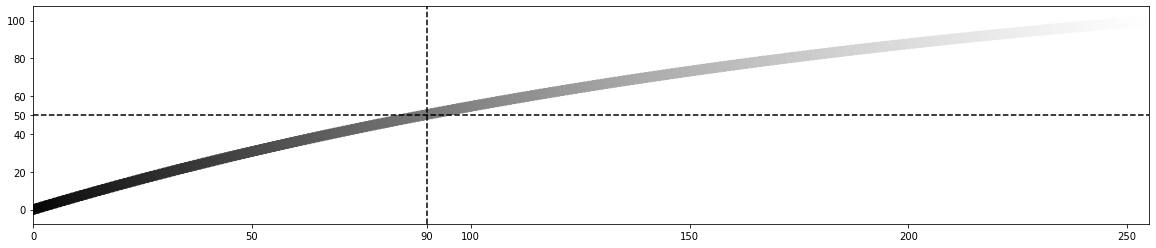

In [10]:
fig, ax = plt.subplots(figsize=(20,4))
plt.yticks(np.array(y_ticks), y_ticks)
plt.xticks(np.array(x_ticks), x_ticks)
plt.scatter(x, y1, s = 100, c = my_exp_cmap(x))
plt.xlim(min(x),max(x))
ax.set_yticks([50], minor=True)
ax.axhline(50, linestyle='--', color='k') 
ax.set_xticks([idx], minor=True)
ax.axvline(idx, linestyle='--', color='k');

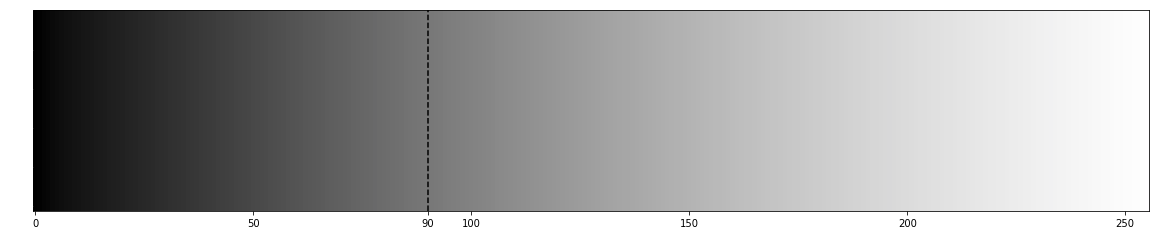

In [11]:
fig, ax = plt.subplots(figsize=(20,4))
plt.imshow(rgb_exponential, aspect=0.18)
ax.axvline(idx, linestyle='--', color='k');
ax.set_xticks(x_ticks);
ax.tick_params(axis='y', color='w', labelcolor='white');

#### Doing the same for Matplotlib's standard grayscale

In [12]:
bw1=cm.gray(np.arange(256))
bw=bw1[:,:-1] # slicing to remove alpha

In [13]:
rbw = np.tile(bw[:,0], (256,1))
gbw = np.tile(bw[:,1], (256,1))
bbw = np.tile(bw[:,2], (256,1))
rgb_bw=np.swapaxes(np.array(list(zip(rbw, gbw, bbw))),1,2)
lab_bw = skl.rgb2lab(rgb_bw)
l_bw = lab_bw[0,:,0]

In [14]:
# finding index
idx1 = np.searchsorted(l_bw, 50, side="right") # first index where value > 0.5

In [15]:
y_ticks1=[0, 20, 40, 50, 60, 80, 100]
x_ticks1 = [0, 50, 100, 150, 200, 250]
x_ticks1.append(idx1)
x_ticks1=sorted(x_ticks1)

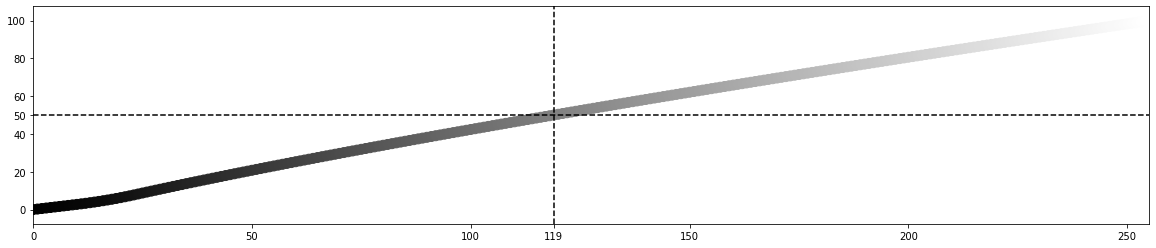

In [16]:
fig, ax = plt.subplots(figsize=(20,4))
plt.yticks(np.array(y_ticks1), y_ticks1)
plt.xticks(np.array(x_ticks1), x_ticks1)
plt.scatter(x, l_bw, s = 100, c = l_bw, cmap='gray')
plt.xlim(min(x),max(x))
ax.set_yticks([50], minor=True)
ax.axhline(50, linestyle='--', color='k') 
ax.set_xticks([idx1], minor=True)
ax.axvline(idx1, linestyle='--', color='k');

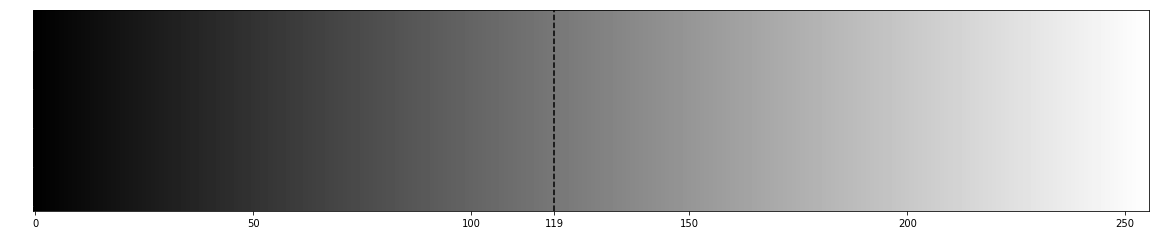

In [17]:
fig, ax = plt.subplots(figsize=(20,4))
plt.imshow(rgb_bw, aspect=0.18)
ax.axvline(idx1, linestyle='--', color='k');
ax.set_xticks(x_ticks1);
ax.tick_params(axis='y', color='w', labelcolor='white');

#### now plot everything toghether

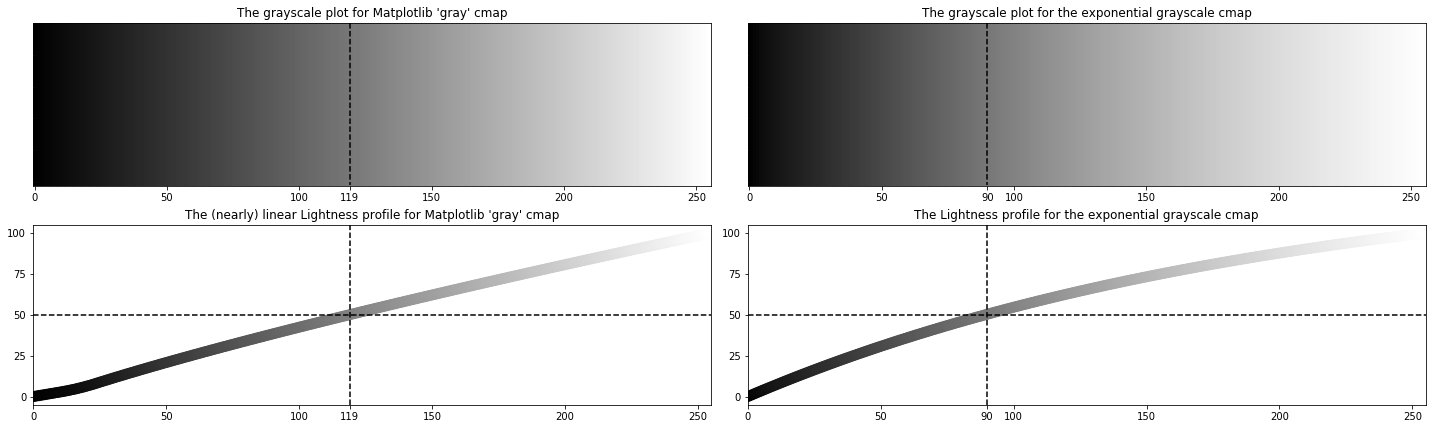

In [18]:

fig = plt.figure(figsize=(20,6))
  
ax0 = plt.subplot2grid((2,2), (1,0))
ax0.set_xlim(min(x),max(x))
ax0.scatter(x,l_bw, s = 100, c = l_bw, cmap='gray')
ax0.set_yticks([50], minor=True)
ax0.set_yticks([0, 25, 50, 75, 100])
ax0.set_yticklabels([0, 25, 50, 75, 100])
ax0.set_xticks([idx1], minor=True)
locx0 = list(ax0.xaxis.get_ticklocs())
locx0.append(idx1)
ax0.set_xticks(locx0)
ax0.set_xlim(min(x),max(x))
ax0.axhline(50, linestyle='--', color='k') 
ax0.axvline(idx1, linestyle='--', color='k')
ax0.set_title('The (nearly) linear Lightness profile for Matplotlib \'gray\' cmap')


ax1 = plt.subplot2grid((2,2), (0,0))
ax1.imshow(rgb_bw, aspect=0.24)
ax1.plot([idx1,idx1], [0,255], '--k')
ax1.set_xticks(x_ticks1);
ax1.tick_params(axis='y', color='w', labelcolor='white')
ax1.set_title('The grayscale plot for Matplotlib \'gray\' cmap')

ax2 = plt.subplot2grid((2,2), (1,1))
ax2.scatter(x,y1, s = 100, c = my_exp_cmap(x))
ax2.set_yticks([50], minor=True)
ax2.set_yticks([0, 25, 50, 75, 100])
ax2.set_yticklabels([0, 25, 50, 75, 100])
ax2.set_xticks([idx], minor=True)
locx = list(ax2.xaxis.get_ticklocs())
locx.append(idx)
ax2.set_xticks(locx)
ax2.set_xlim(min(x),max(x))
ax2.axhline(50, linestyle='--', color='k') 
ax2.axvline(idx, linestyle='--', color='k')
ax2.set_title('The Lightness profile for the exponential grayscale cmap')

ax3 = plt.subplot2grid((2,2), (0,1))
ax3.imshow(rgb_exponential, aspect=0.24)
ax3.plot([idx,idx], [0,255], '--k')
ax3.set_xticks(x_ticks);
ax3.tick_params(axis='y', color='w', labelcolor='white')
ax3.set_title('The grayscale plot for the exponential grayscale cmap')

plt.tight_layout();

#### Compare the two colormaps on a seismic amp

In [19]:
data=np.load('F3_dip_steered_med_IL230-43_XL475-675_T1660.npy')
data.shape

(201, 201)

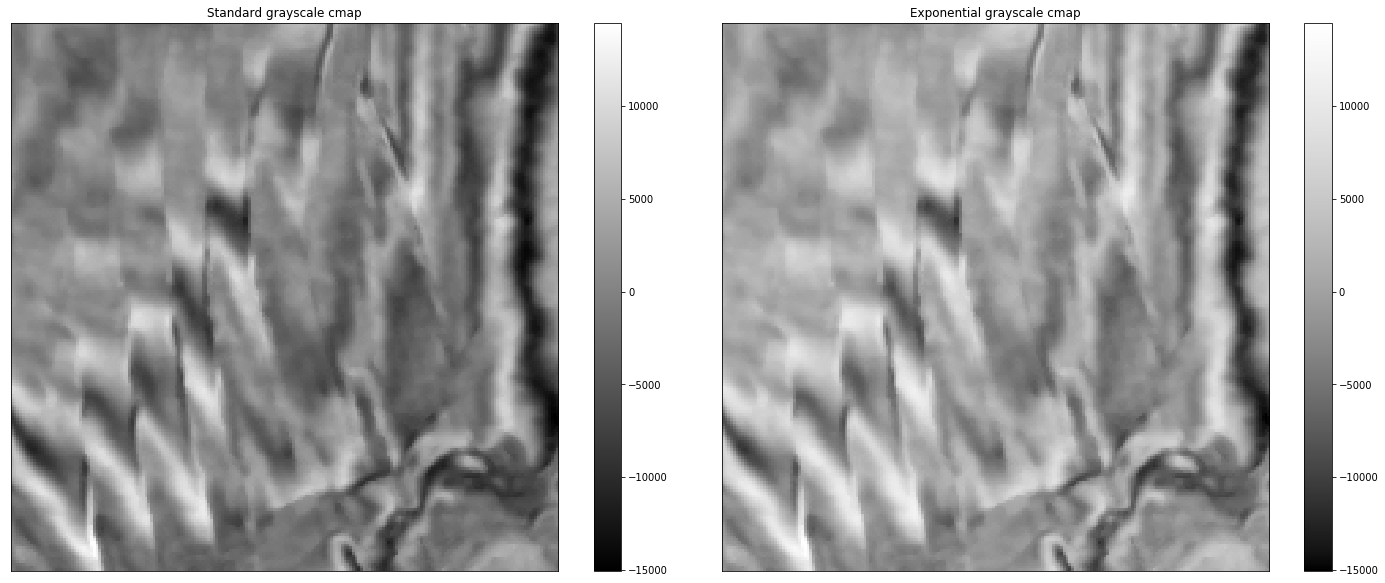

In [20]:
fig = plt.figure(figsize=(20,8))
ax0 = fig.add_subplot(1, 2, 1)
plt.imshow(data, cmap = 'gray')
plt.colorbar()
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title('Standard grayscale cmap')

ax1 = fig.add_subplot(1, 2, 2)
plt.imshow(data, cmap = my_exp_cmap)
plt.colorbar()
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Exponential grayscale cmap')

plt.tight_layout();

#### Optional export of exponential grayscale array to a text file

In [21]:
#save_rgb_exponential = np.round(rgb_exponential[0, :, :], decimals=4)

In [22]:
#np.savetxt('rgb_exponential_grays.txt',save_rgb_exponential,delimiter=',', fmt='%1.4f')